Klastering data twitter menggunakan keyword "penembakan" dimulai dari tanggal 1-30 September 2022

Pertama install library snscrape.  Library snscrape digunakan
karena mudah digunakan dan tidak perlu mengakses langsung
Twitter API dengan access key atau token, sehingga tidak
diperlukan akun Developer Twitter.

In [ ]:
!pip3 install snscrape

Kedua, install library langdetect. 

In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=76605ecd895fc7c3386a17750a906ec7b4d6d6c03d01765eaca254a1ad298f8b
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


Mengimport snscrape modules twitter dan json

In [ ]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [ ]:
Menulis keyword dan mengatur tanggal awal dan akhir yang digunakan

In [ ]:
keywords=['penembakan']
start="2022–09–01"
end ="2022–09-30"
max_num=10
fname='tweet.json' 
languages=['id','en']

Mengimport library panda

In [ ]:
import pandas as pd
datatw=[]

In [ ]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [ ]:
datatw

['@kumparan Lah emang bukan karena gas air mata lah, karena ada penembakan gas air mata kemudian penonton di tribun lagi aman damai sejahtera jd panik dsb.. Kaga ada yg nyalahin gas air matanya 🙏🏻',
 '@siapkawalpolri Dari ketiga polisi yg sdh ditetapkan sebgai tersangka itu menandakan bahwa polri sangat serius mengungkapkan tragedi inii, selanjutnya polri tinggal tanya ke tersangka siapa yg perintahkan penembakan gas air mata itu. Usut tuntas tragedi kanjuruhan. @ListyoSigitP @DivHumas_Polri',
 'TGIPF mengejar perwira polisi level tertinggi yang memerintahkan penembakan gas air mata di Stadion Kanjuruhan. Diduga ada kepentingan iklan sehingga laga Arema versus Persebaya digelar pada malam hari.\n#KoranTempo  https://t.co/eHlVvuTOgI',
 'Kronologi Penembakan Salah Sasaran di AS, Korban Seorang WNI asal Semarang https://t.co/8ilbdGbCvm',
 'Insiden penembakan di Bexar County, Texas, menewaskan seorang warga negara Indonesia. Dubes AS untuk Indonesia Sung Yong Kim memastikan adanya investig

Menginstal sastrawi 

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [ ]:
documents_clean[0:5]

['kumpar lah emang bukan gas air mata lah tembak gas air mata kemudian tonton tribun aman damai sejahtera jd panik kaga ada yg nyalahin gas air mata',
 'siapkawalpolri tiga polisi yg sdh tetap sebgai sangka tanda polri sangat serius ungkap tragedi lanjut polri tinggal tanya sangka siapa yg perintah tembak gas air mata usut tuntas tragedi kanjuruhan listyosigitp divhumas polri',
 'tgipf kejar perwira polisi level tinggi perintah tembak gas air mata stadion kanjuruhan duga penting iklan laga arema versus baya gelar malam hari korantempo https t co ehlvvutogi',
 'kronologi tembak salah sasar as korban orang wni asal semarang https t co ilbdgbcvm',
 'insiden tembak bexar county texas tewas orang warga negara indonesia dubes as indonesia sung yong kim ada investigasi peristiwa internasional adadikompas https t co qpgfinisgw']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

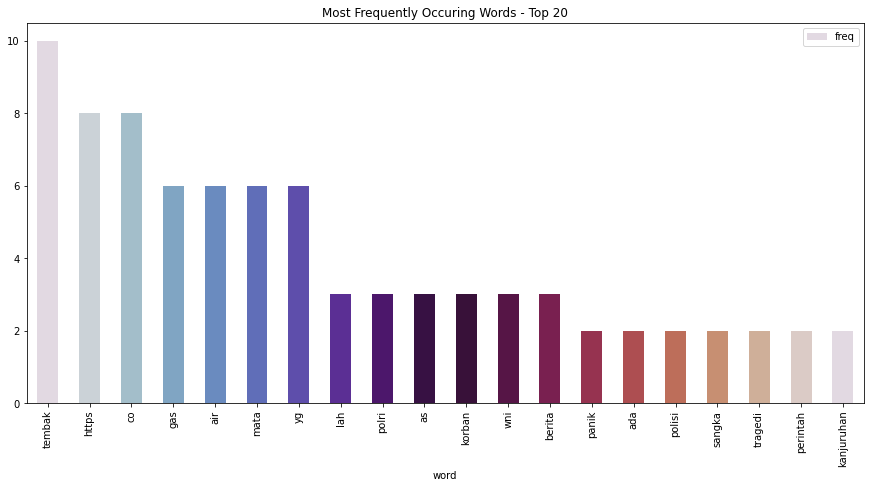

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [ ]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 kedaluarsa
 mata
 ratus
 polri
 https
 sebut
 olvmulct
 co
 nyawa
 biru
Cluster 1:
 co
 https
 kanjuruhan
 tragedi
 polisi
 masing
 aremania
 jatim
 suporter
 tinggal
Cluster 2:
 aniesbaswedan
 salah
 pak
 kasus
 co
 harun
 qefubzdfzt
 puas
 https
 listyosigitp




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


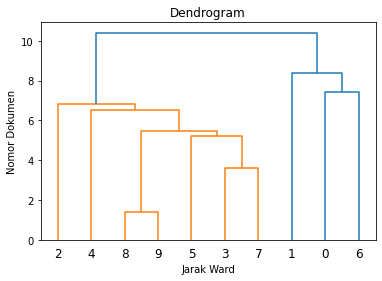

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

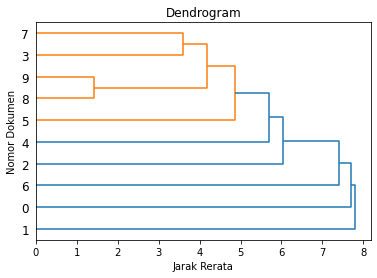

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[3 5 4 0 2 0 1 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


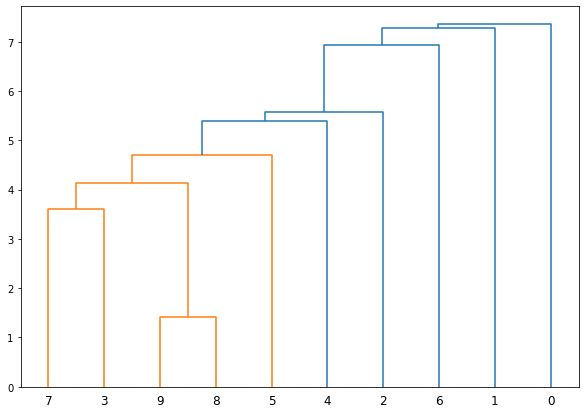

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

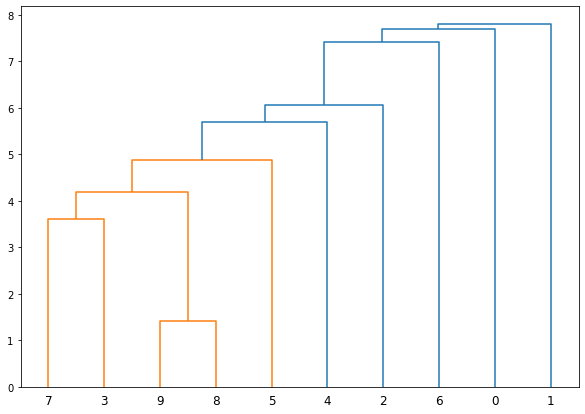

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

https://www.freecodecamp.org/news/python-web-scraping-tutorial/
https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721